# Train a model to detect boxes

In [19]:
import os
import torch
import ultralytics
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
ultralytics.checks()
print(f"CUDA available {torch.cuda.is_available()}")

Ultralytics 8.3.81 🚀 Python-3.9.20 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Super with Max-Q Design, 7967MiB)
Setup complete ✅ (16 CPUs, 62.5 GB RAM, 410.9/915.3 GB disk)
CUDA available True


In [24]:
%matplotlib inline

In [2]:
model = YOLO('yolo11n.pt')

In [6]:
config = {
    'data': f'{os.getcwd()}/.data/datasets/box-uchlt/data.yaml',
    'epochs': 50,
    'device': '0' if torch.cuda.is_available() else 'cpu',
    'imgsz': (640, 480),
    'patience': 3,
    'save': True,
    'save_period': 1,
    'cache': True,
    'batch': 8,
    'workers': 1,
    'pretrained': True,
    'cos_lr': True,
    'optimizer': 'Adam',
    'lr0': 0.001,
    'weight_decay': 0.0005,
    'close_mosaic': 5,
    'dropout': 0.3,
    'project': f'{os.getcwd()}/.data/runs/train',
    'name': 'organaizer'
}

In [7]:
# Train the model
results = model.train(**config)

New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.81 🚀 Python-3.9.20 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Super with Max-Q Design, 7967MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/data.yaml, epochs=50, time=None, patience=5, batch=8, imgsz=(640, 480), save=True, save_period=1, cache=True, device=0, workers=1, project=/home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train, name=organaizer7, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=5, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False

train: Scanning /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/train/labels.cache... 8022 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8

train: WARNING ⚠️ /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/train/images/net-1424-_jpg.rf.1145d339d55820d724c407ce2f059aa1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/train/images/net-1424-_jpg.rf.1d990d96ad4e8f767ee9b825fd59922a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/train/images/net-1424-_jpg.rf.1ddfde1f209acd4a25e6a4e650d2f032.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/train/images/net-1424-_jpg.rf.398e6ebcdea1f7d379ac9346ab15d738.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/train/images/net-1424-_jpg.rf.3b1398810af7aa6fae56f75d5e5b9de5.jpg: 1 duplicate labels removed


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (9.2GB RAM): 100%|██████████| 8022/8022 [00:03<00:00, 2608.08it/s]
val: Scanning /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/valid/labels.cache... 712 images, 0 backgrounds, 0 corrupt: 100%|██████████| 712/

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 11685, len(boxes) = 12131. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 712/712 [00:00<00:00, 2893.94it/s]


Plotting labels to /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train/organaizer7/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train/organaizer7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.5G     0.9032      0.951      1.105        278        640: 100%|██████████| 1003/1003 [01:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.38it/s]


                   all        712      12131      0.723      0.562      0.646      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.24G      0.733     0.6465      1.016        213        640: 100%|██████████| 1003/1003 [01:26<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.01it/s]

                   all        712      12131      0.782      0.715      0.783      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.29G     0.6755     0.5694     0.9929        141        640: 100%|██████████| 1003/1003 [01:30<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.66it/s]

                   all        712      12131      0.835      0.749      0.835      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.23G     0.6351     0.5255     0.9767        113        640: 100%|██████████| 1003/1003 [01:30<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.77it/s]


                   all        712      12131      0.843      0.754      0.839      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         2G     0.5973     0.4822       0.96        197        640: 100%|██████████| 1003/1003 [01:34<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.52it/s]

                   all        712      12131      0.853      0.745      0.838      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G     0.5748     0.4609     0.9517        146        640: 100%|██████████| 1003/1003 [01:34<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.59it/s]

                   all        712      12131      0.863      0.762      0.852      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.12G     0.5596     0.4464     0.9466        200        640: 100%|██████████| 1003/1003 [01:34<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.55it/s]


                   all        712      12131      0.844      0.753      0.839      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.24G     0.5469     0.4365     0.9422        192        640: 100%|██████████| 1003/1003 [01:34<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.20it/s]


                   all        712      12131      0.858       0.77      0.854      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.03G     0.5302     0.4235     0.9363        175        640: 100%|██████████| 1003/1003 [01:35<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.55it/s]

                   all        712      12131      0.874      0.797      0.877      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.29G      0.522     0.4126     0.9316        302        640: 100%|██████████| 1003/1003 [01:38<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.41it/s]

                   all        712      12131      0.875      0.798      0.881       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.43G     0.5124     0.4056     0.9293        182        640: 100%|██████████| 1003/1003 [01:36<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.83it/s]


                   all        712      12131      0.876      0.805      0.884      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.03G     0.5018     0.3989     0.9262        187        640: 100%|██████████| 1003/1003 [01:46<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.83it/s]

                   all        712      12131      0.875      0.806      0.886      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.71G     0.4959     0.3901     0.9236        148        640: 100%|██████████| 1003/1003 [01:46<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.41it/s]

                   all        712      12131      0.875      0.795       0.88       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.82G     0.4774     0.3772      0.916        186        640: 100%|██████████| 1003/1003 [01:44<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.42it/s]


                   all        712      12131      0.887      0.807      0.891      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.24G     0.4754     0.3729     0.9157        187        640: 100%|██████████| 1003/1003 [01:45<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.92it/s]

                   all        712      12131      0.887      0.803      0.888      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.7G      0.475      0.373     0.9162        238        640: 100%|██████████| 1003/1003 [01:42<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.42it/s]

                   all        712      12131      0.886      0.815      0.893      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.95G      0.462     0.3625     0.9126        205        640: 100%|██████████| 1003/1003 [01:41<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.09it/s]

                   all        712      12131      0.894      0.813      0.895      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.93G     0.4546     0.3583     0.9089        300        640: 100%|██████████| 1003/1003 [01:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.26it/s]

                   all        712      12131        0.9      0.813      0.896      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G     0.4527     0.3562     0.9089        161        640: 100%|██████████| 1003/1003 [01:39<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.64it/s]

                   all        712      12131      0.904      0.807      0.895      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.45G     0.4476     0.3518     0.9075        128        640: 100%|██████████| 1003/1003 [01:40<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.49it/s]

                   all        712      12131      0.892       0.82      0.898       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.82G     0.4382     0.3437     0.9043        253        640: 100%|██████████| 1003/1003 [01:41<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.31it/s]

                   all        712      12131      0.895      0.817      0.898      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.9G     0.4358     0.3392     0.9018        152        640: 100%|██████████| 1003/1003 [01:37<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.35it/s]


                   all        712      12131      0.905      0.816      0.904      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.95G     0.4254      0.333     0.8993        126        640: 100%|██████████| 1003/1003 [01:40<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.69it/s]


                   all        712      12131      0.896      0.826      0.906       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.51G     0.4255     0.3331     0.8994        160        640: 100%|██████████| 1003/1003 [01:38<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.27it/s]

                   all        712      12131      0.911      0.824      0.911      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.83G     0.4182     0.3251     0.8964        117        640: 100%|██████████| 1003/1003 [01:40<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.10it/s]

                   all        712      12131       0.91      0.831      0.914      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.04G     0.4154     0.3251     0.8962        153        640: 100%|██████████| 1003/1003 [01:40<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.15it/s]

                   all        712      12131      0.903      0.824      0.909      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.6G     0.4065     0.3176      0.893        153        640: 100%|██████████| 1003/1003 [01:38<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.32it/s]

                   all        712      12131      0.915      0.819      0.911      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G     0.3982     0.3107     0.8904        190        640: 100%|██████████| 1003/1003 [01:39<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.22it/s]

                   all        712      12131      0.916      0.827      0.916      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.8G     0.3971      0.311     0.8902        137        640: 100%|██████████| 1003/1003 [01:41<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.24it/s]

                   all        712      12131      0.912      0.833      0.915      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.67G     0.3918     0.3053     0.8896        221        640: 100%|██████████| 1003/1003 [01:38<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.01it/s]

                   all        712      12131      0.912      0.836      0.915      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.16G     0.3843     0.2987     0.8844        200        640: 100%|██████████| 1003/1003 [01:44<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.14it/s]

                   all        712      12131      0.917      0.837      0.919       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.31G     0.3784     0.2953     0.8846        154        640: 100%|██████████| 1003/1003 [01:44<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.23it/s]


                   all        712      12131      0.925      0.831       0.92      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.82G     0.3781     0.2937     0.8828        174        640: 100%|██████████| 1003/1003 [01:49<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.68it/s]


                   all        712      12131       0.91      0.848       0.92      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.68G      0.372     0.2891     0.8817        201        640: 100%|██████████| 1003/1003 [01:45<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.36it/s]

                   all        712      12131      0.922      0.838      0.921      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.88G     0.3657     0.2833     0.8788        124        640: 100%|██████████| 1003/1003 [01:51<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.43it/s]

                   all        712      12131      0.925      0.841      0.923      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.7G     0.3615     0.2801     0.8781        110        640: 100%|██████████| 1003/1003 [01:45<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.73it/s]

                   all        712      12131      0.917      0.849      0.925      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.03G      0.362     0.2818     0.8791        186        640: 100%|██████████| 1003/1003 [01:46<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.47it/s]


                   all        712      12131       0.92      0.843      0.922      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.88G     0.3549     0.2752     0.8775        132        640: 100%|██████████| 1003/1003 [01:52<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.57it/s]


                   all        712      12131      0.928      0.838      0.924      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.93G     0.3508     0.2721      0.874        121        640: 100%|██████████| 1003/1003 [01:49<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:05<00:00,  8.87it/s]


                   all        712      12131      0.919      0.845      0.925       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.09G     0.3506     0.2727     0.8757        113        640: 100%|██████████| 1003/1003 [01:53<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.63it/s]


                   all        712      12131      0.931      0.838      0.925      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.24G     0.3448     0.2669     0.8725        196        640: 100%|██████████| 1003/1003 [01:53<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.29it/s]


                   all        712      12131      0.928       0.84      0.926      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.46G     0.3422     0.2653     0.8712        183        640: 100%|██████████| 1003/1003 [01:53<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.61it/s]


                   all        712      12131      0.924      0.852      0.929      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.49G     0.3387     0.2628     0.8718        106        640: 100%|██████████| 1003/1003 [01:48<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:05<00:00,  8.77it/s]


                   all        712      12131      0.925      0.851       0.93      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G     0.3326     0.2585     0.8698        228        640: 100%|██████████| 1003/1003 [01:49<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.34it/s]


                   all        712      12131      0.928      0.848      0.929      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.88G     0.3342     0.2586     0.8694        147        640: 100%|██████████| 1003/1003 [01:51<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.45it/s]


                   all        712      12131      0.927      0.848      0.929      0.766
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.65G     0.7972     0.5762      1.108         62        640: 100%|██████████| 1003/1003 [01:45<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00, 10.13it/s]

                   all        712      12131      0.919      0.847      0.925      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.76G      0.768      0.539      1.078        144        640: 100%|██████████| 1003/1003 [01:41<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.73it/s]


                   all        712      12131      0.923      0.846      0.926      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.62G     0.7594     0.5304      1.071        151        640: 100%|██████████| 1003/1003 [01:46<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:04<00:00,  9.85it/s]

                   all        712      12131      0.926      0.846      0.928      0.765
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 43, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



48 epochs completed in 1.434 hours.
Optimizer stripped from /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train/organaizer7/weights/last.pt, 5.5MB
Optimizer stripped from /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train/organaizer7/weights/best.pt, 5.5MB

Validating /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train/organaizer7/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.9.20 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Super with Max-Q Design, 7967MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:06<00:00,  7.00it/s]


                   all        712      12131      0.923      0.853       0.93      0.768
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/runs/train/organaizer7


# Plot training results

In [25]:
def plot_metrics(results):
    df = pd.read_csv(f'{results.save_dir}/results.csv')

    plot_columns = [
        'train/box_loss', 'val/box_loss',
        'train/dfl_loss', 'val/dfl_loss',
        'train/cls_loss', 'val/cls_loss',
        'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)'
    ]
    
    # Create plots
    num_plots = len(plot_columns)
    rows = (num_plots + 1) // 2
    cols = min(num_plots, 2)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, col in enumerate(plot_columns):
        if col in df.columns:
            axes[i].plot(df['epoch'], df[col], label=col)
            axes[i].set_xlabel('Epoch')
            axes[i].set_ylabel(col)
            axes[i].set_title(col)
            axes[i].legend()
        else:
            print(f"Warning: Column '{col}' not found in results.")
    
    # Remove any unused subplots
    if num_plots < len(axes):
        for i in range(num_plots, len(axes)):
            fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

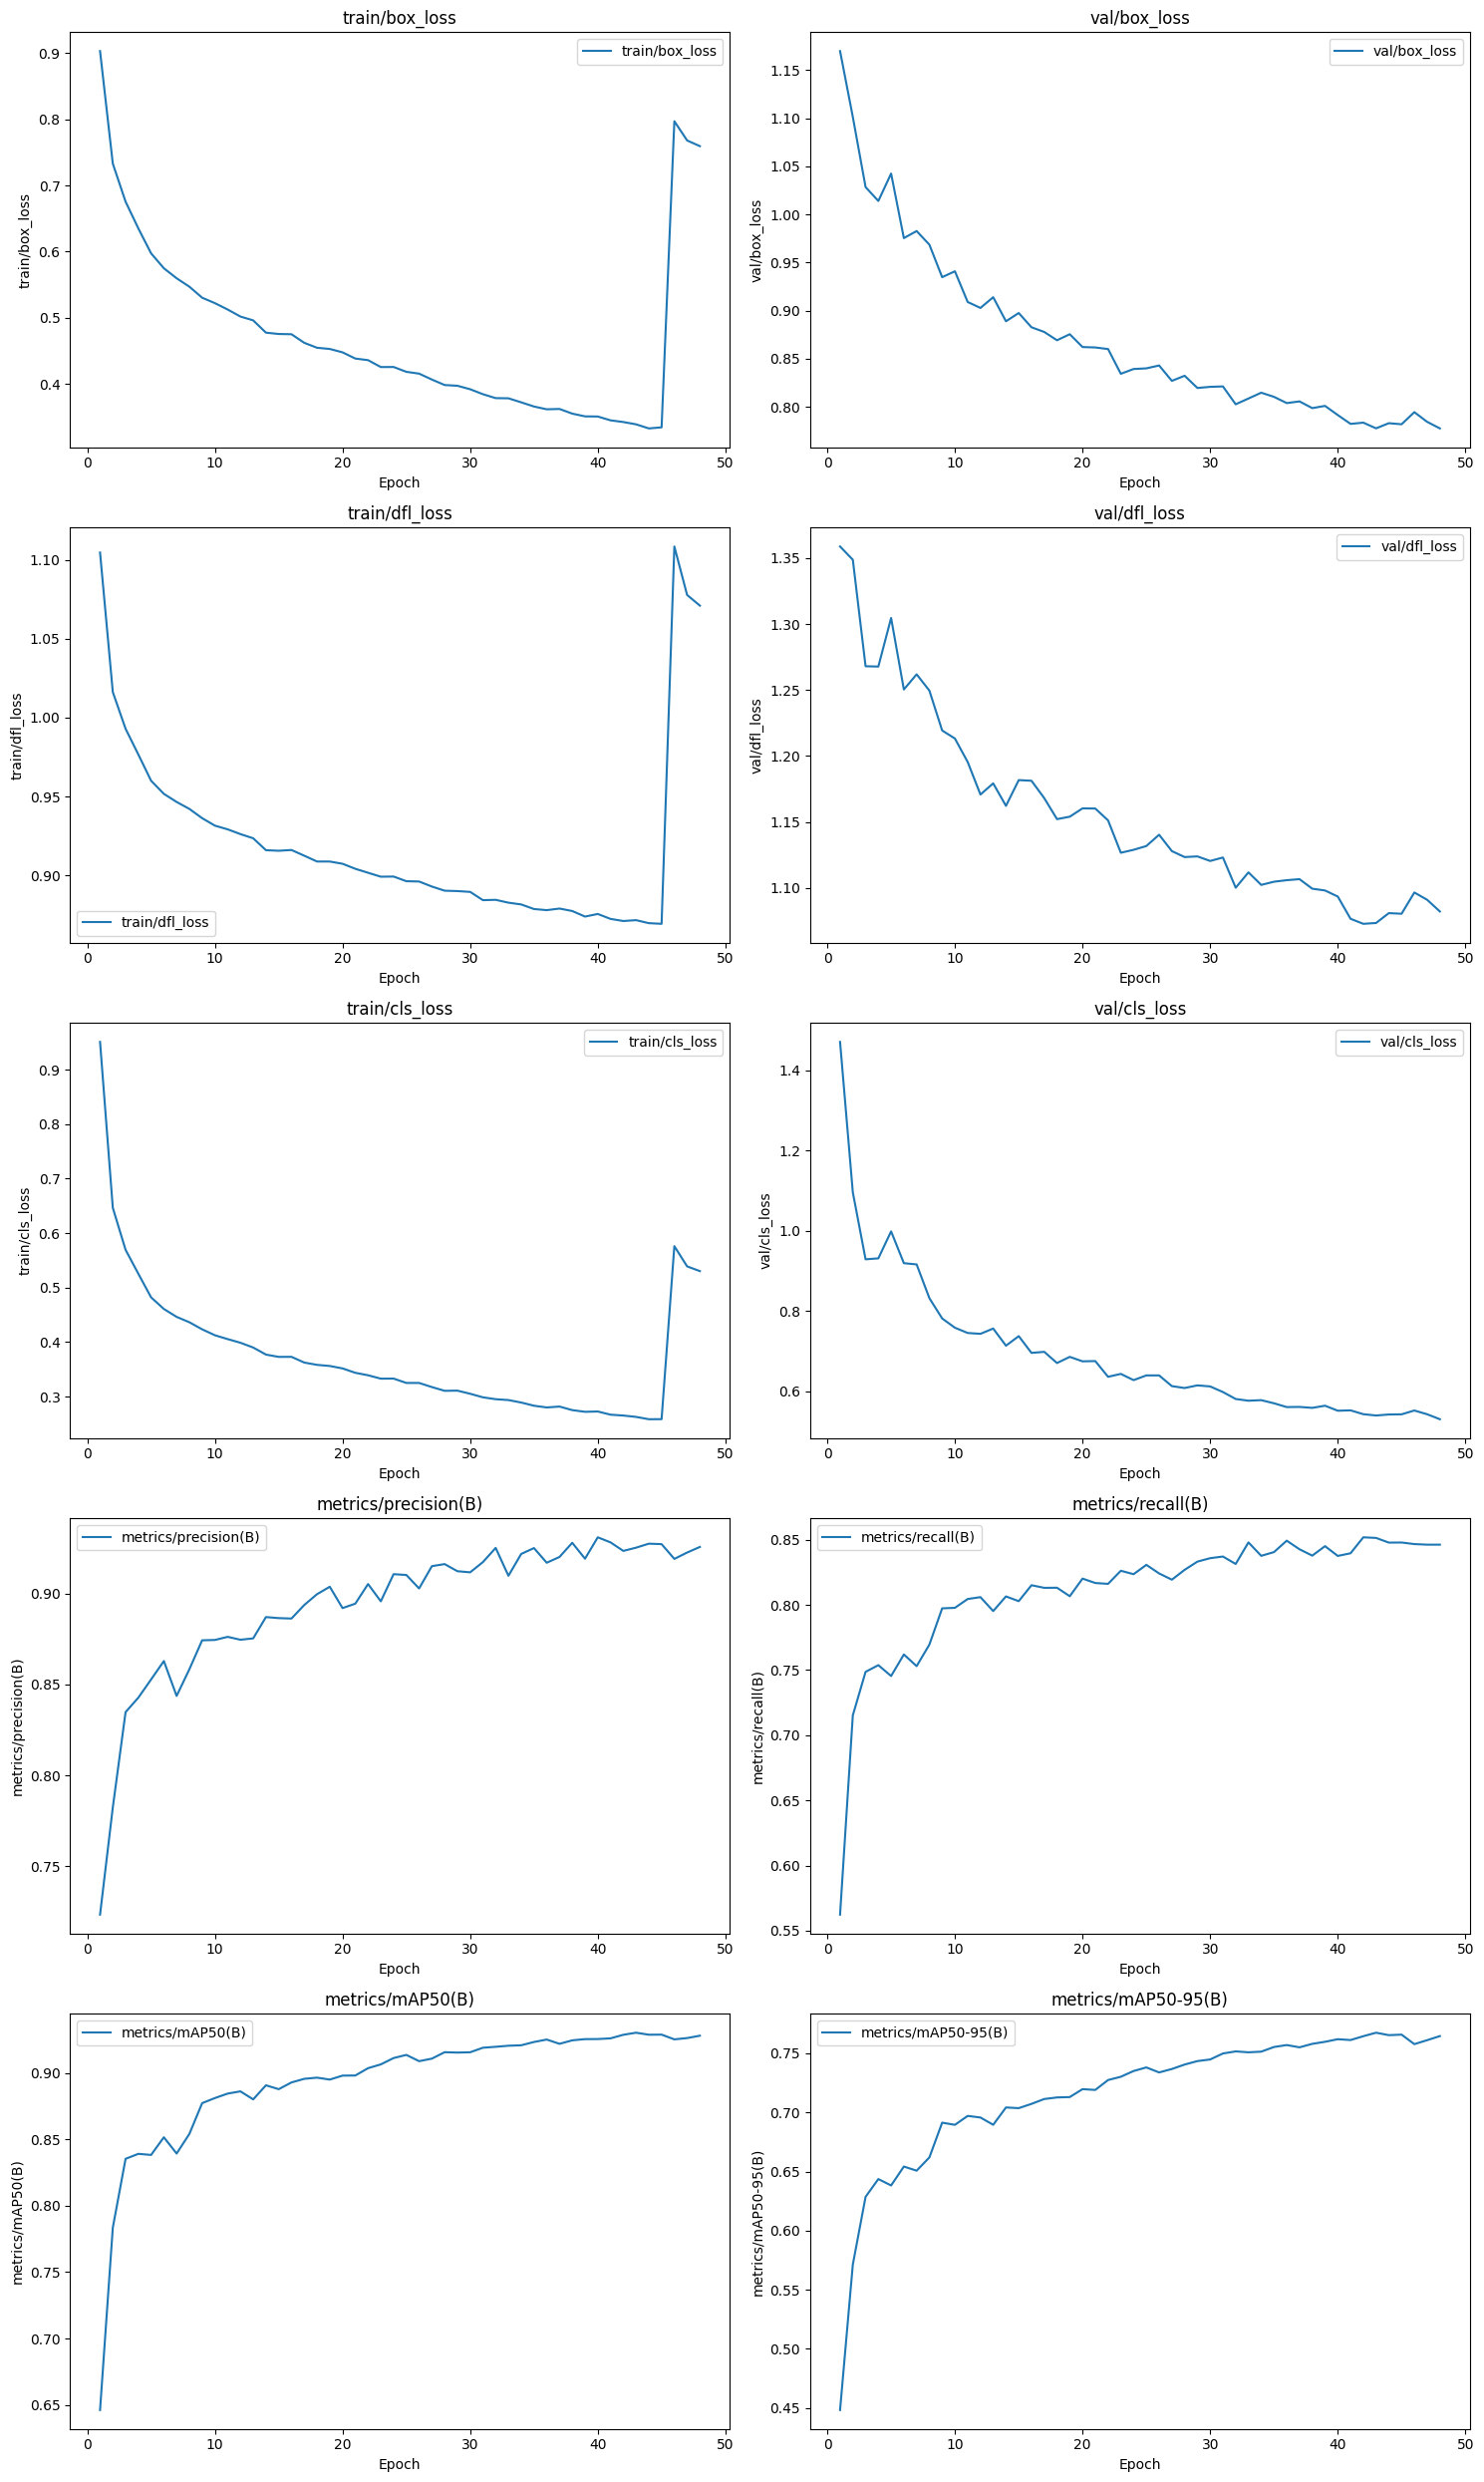

In [26]:
plot_metrics(results)

Based on the results, it looks that after epoch 45 the model may be overfitting, so we'll select the model at epoch 45.

In [50]:
# Load the best model and evaluate it.
model = YOLO(f'{results.save_dir}/weights/epoch45.pt').to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
# Evaluate on validation set
metrics = model.val()

YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/gabriel/projects/maestria/Semestre3/organaizer/training/.data/datasets/box-uchlt/valid/labels.cache... 712 images, 0 backgrounds, 0 corrupt: 100%|██████████| 712/

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 11685, len(boxes) = 12131. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:07<00:00,  6.41it/s]


                   all        712      12131      0.919      0.847      0.925      0.758
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /home/gabriel/projects/maestria/Semestre3/organaizer/runs/detect/val5


In [51]:
model.save('best.pt')